# PyTorch로 시작하는 딥러닝 입문

## 3장 : Logistic Regression

https://wikidocs.net/60036

일상 속의 많은 문제 중에 둘 중 하나를 결정하는 문제를 이진분류(Bianry Classification)이라고 합니다. 그리고 이진 분류를 풀기 위한 대표적인 알고리즘으로 Logistic Regression이 있습니다.

Logtistic Regression은 회귀의 이름을 하고 있지만 실제로는 분류에 사용됩니다!

## 3.1 Binary Classification

학생들의 점수를 보고 60점 이상의 점수를 합격 그렇지 않은 점수를 불합격이라고 할 때, 그래프를 그려보면 아래와 같습니다.

![](https://wikidocs.net/images/page/22881/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80.PNG)

이러한 점들을 표현하는 그래프는 Linear Regression과 다르게 직선함수가 아니라 S자 형태입니다. 직선을 사용할 경우 분류 작업이 잘 동작하지 않을 것이며 그렇기에 S자 모양의 그래프를 만들 수 있는 어떤 특정 함수 f를 추가적으로 사용하여야 합니다. 바로 시그모이드 함수입니다.

## 3.2 Sigmoid Function

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>H</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mi>s</mi>
  <mi>i</mi>
  <mi>g</mi>
  <mi>m</mi>
  <mi>o</mi>
  <mi>i</mi>
  <mi>d</mi>
  <mo stretchy="false">(</mo>
  <mi>W</mi>
  <mi>x</mi>
  <mo>+</mo>
  <mi>b</mi>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mrow>
      <mn>1</mn>
      <mo>+</mo>
      <msup>
        <mi>e</mi>
        <mrow data-mjx-texclass="ORD">
          <mo>&#x2212;</mo>
          <mo stretchy="false">(</mo>
          <mi>W</mi>
          <mi>x</mi>
          <mo>+</mo>
          <mi>b</mi>
          <mo stretchy="false">)</mo>
        </mrow>
      </msup>
    </mrow>
  </mfrac>
  <mo>=</mo>
  <mi>&#x3C3;</mi>
  <mo stretchy="false">(</mo>
  <mi>W</mi>
  <mi>x</mi>
  <mo>+</mo>
  <mi>b</mi>
  <mo stretchy="false">)</mo>
</math>

Sigmoid Function은 다음과 같은 수식으로 표현할 수 있습니다.
선형 회귀에서는 최적의 W와 b를 찾는 것이 목표였다면 여기서도 마찬가지입니다.

In [1]:
%matplotlib inline
import numpy as np # 넘파이 사용
import matplotlib.pyplot as plt # 맷플롯립사용

In [2]:
def sigmoid(x): # 시그모이드 함수 정의
    return 1/(1+np.exp(-x))

### W가 1이고 b가 0인 그래프

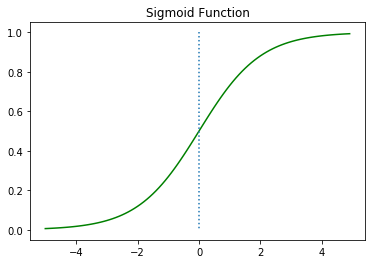

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

### W값의 변화에 따른 경사도의 변화

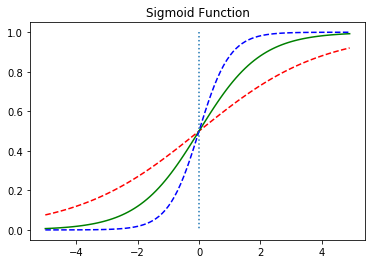

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # W의 값이 0.5일때
plt.plot(x, y2, 'g') # W의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # W의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

## 3.2 Logistic Regression with Pytorch

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

C:\Users\82104\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [10]:
torch.manual_seed(1)

In [11]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [12]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


In [13]:
W = torch.zeros((2, 1), requires_grad=True) # 크기는 2 x 1
b = torch.zeros(1, requires_grad=True)

In [14]:
# 위의 Sigmoid Function의 수식과 같습니다.
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

In [15]:
print(hypothesis) # 예측값인 H(x) 출력

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)


In [16]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)

In [17]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)


In [18]:
losses = -(y_train * torch.log(hypothesis) + 
           (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [19]:
# 6개의 오차들에 대한 평균 계산
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [20]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [21]:
# 모델 초기화
W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산
    hypothesis = torch.sigmoid(x_train.matmul(W) + b)
    cost = -(y_train * torch.log(hypothesis) + 
             (1 - y_train) * torch.log(1 - hypothesis)).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031673
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


In [22]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)
print(hypothesis)

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01],
        [9.9969e-01]], grad_fn=<SigmoidBackward0>)


In [23]:
prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [24]:
print(W)
print(b)

tensor([[3.2530],
        [1.5179]], requires_grad=True)
tensor([-14.4819], requires_grad=True)


## 3.2 Logistic Regression with Class

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [26]:
torch.manual_seed(1)

In [27]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [28]:
model = BinaryClassifier()

In [29]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = model(x_train)

    # cost 계산
    cost = F.binary_cross_entropy(hypothesis, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 20번마다 로그 출력
    if epoch % 10 == 0:
        prediction = hypothesis >= torch.FloatTensor([0.5]) # 예측값이 0.5를 넘으면 True로 간주
        correct_prediction = prediction.float() == y_train # 실제값과 일치하는 경우만 True로 간주
        accuracy = correct_prediction.sum().item() / len(correct_prediction) # 정확도를 계산
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format( # 각 에포크마다 정확도를 출력
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))

Epoch    0/1000 Cost: 0.539713 Accuracy 83.33%
Epoch   10/1000 Cost: 0.614853 Accuracy 66.67%
Epoch   20/1000 Cost: 0.441875 Accuracy 66.67%
Epoch   30/1000 Cost: 0.373145 Accuracy 83.33%
Epoch   40/1000 Cost: 0.316358 Accuracy 83.33%
Epoch   50/1000 Cost: 0.266094 Accuracy 83.33%
Epoch   60/1000 Cost: 0.220498 Accuracy 100.00%
Epoch   70/1000 Cost: 0.182095 Accuracy 100.00%
Epoch   80/1000 Cost: 0.157299 Accuracy 100.00%
Epoch   90/1000 Cost: 0.144091 Accuracy 100.00%
Epoch  100/1000 Cost: 0.134272 Accuracy 100.00%
Epoch  110/1000 Cost: 0.125769 Accuracy 100.00%
Epoch  120/1000 Cost: 0.118297 Accuracy 100.00%
Epoch  130/1000 Cost: 0.111680 Accuracy 100.00%
Epoch  140/1000 Cost: 0.105779 Accuracy 100.00%
Epoch  150/1000 Cost: 0.100483 Accuracy 100.00%
Epoch  160/1000 Cost: 0.095704 Accuracy 100.00%
Epoch  170/1000 Cost: 0.091369 Accuracy 100.00%
Epoch  180/1000 Cost: 0.087420 Accuracy 100.00%
Epoch  190/1000 Cost: 0.083806 Accuracy 100.00%
Epoch  200/1000 Cost: 0.080486 Accuracy 100.00